In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('logs/log_ppo_4_compressed_all.csv', names=["episode", "step", "episode_reward", "world", "level", "level_progress", "episode_length"])
df

,episode,step,episode_reward,world,level,level_progress,episode_length
0,0,364,22,1,1,320,365
1,0,428,57,1,1,359,429
2,0,432,37,1,1,344,433
3,0,899,18,1,1,317,900
4,0,985,33,1,1,334,986
...,...,...,...,...,...,...,...
5648,346,409387,503,1,1,812,970
5649,357,409425,620,1,1,939,927
5650,355,409470,824,1,1,1125,610
5651,362,409478,467,1,1,785,1355


In [24]:
binned_df = df.groupby(pd.cut(df['step'], bins=range(0, 5000 * (max(df['step']) // 5000) + 5000, 5000)))['episode_reward'].mean().reset_index()
binned_df

/tmp/ipykernel_2811220/470501487.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_df = df.groupby(pd.cut(df['step'], bins=range(0, 5000 * (max(df['step']) // 5000) + 5000, 5000)))['episode_reward'].mean().reset_index()


,step,episode_reward
0,"(0, 5000]",399.727273
1,"(5000, 10000]",383.593220
2,"(10000, 15000]",404.387097
3,"(15000, 20000]",406.137931
4,"(20000, 25000]",426.603774
...,...,...
76,"(380000, 385000]",591.290323
77,"(385000, 390000]",717.826087
78,"(390000, 395000]",640.582278
79,"(395000, 400000]",570.691176


In [26]:
binned_df['step'] = binned_df['step'].map(lambda x: x.mid)

<Axes: xlabel='step', ylabel='episode_reward'>

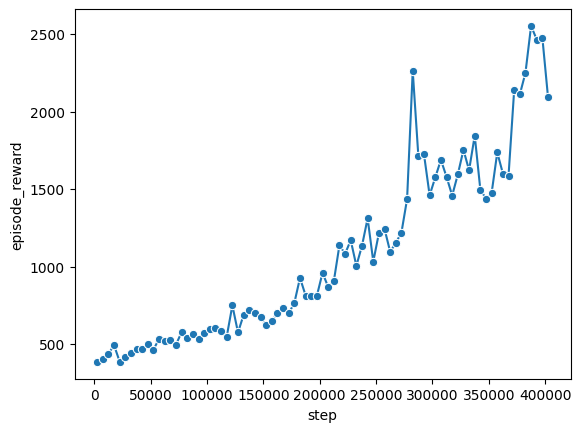

In [18]:
sns.lineplot(x='step', y='episode_reward', data=binned_df, marker='o')

<Axes: xlabel='step', ylabel='episode_reward'>

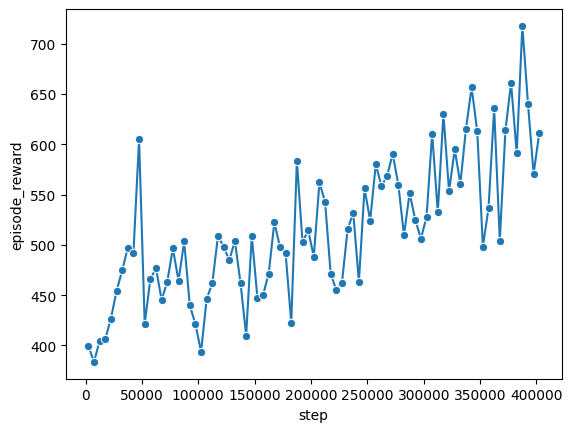

In [27]:
sns.lineplot(x='step', y='episode_reward', data=binned_df, marker='o')